# `PREDICCIÓN DE LA INTENCIÓN DE COMPRA EN UN COMERCIO ON-LINE`

---
---
---

# `Descripción del Dataset`

Este dataset contiene datos de 12,330 sesiones en un sitio de comercio electrónico, con el objetivo de predecir si una sesión resultará en una compra. De las 12,330 sesiones, el 84.5% (10,422) no finalizaron en compra, mientras que el 15.5% restante (1,908) sí culminaron en una transacción. Esto lo convierte en un problema de **clasificación binaria desbalanceada** donde la etiqueta de clase es el atributo `Revenue`, que indica si una sesión terminó o no en compra.

El dataset está diseñado para representar sesiones individuales de distintos usuarios en un período de un año, lo cual elimina la tendencia hacia campañas específicas, días especiales, perfiles de usuario o períodos concretos. Con un total de **17 atributos** (10 numéricos y 8 categóricos), se pueden realizar tareas de clasificación y clustering, utilizando características numéricas como `Bounce Rate`, `Exit Rate`, y `Page Value`, así como datos categóricos sobre el sistema operativo, tipo de tráfico y tipo de visitante.

Este dataset se obtuvo de la UC Irvine Machine Learning Repository y está disponible en: [https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset).

Esta colección de datos es ideal para explorar comportamientos de compra en línea y construir modelos que ayuden a predecir la probabilidad de conversión de usuarios en futuras sesiones.



| Columna                        | Descripción                                                                                                                                                                                                                                                                                                                                                                                |
|---------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `Revenue`                       | Indica si la sesión concluyó con una transacción; se puede usar como etiqueta de clase (target).                                                                                                                                                                                                                                                                                           |
| `Administrative`                | Número de páginas de tipo administrativo visitadas por el usuario en esa sesión.                                                                                                                                                                                                                                                                                                           |
| `Administrative Duration`       | Tiempo total que el usuario pasó en páginas de tipo administrativo durante esa sesión.                                                                                                                                                                                                                                                                                                     |
| `Informational`                 | Número de páginas de tipo informativo visitadas por el usuario en esa sesión.                                                                                                                                                                                                                                                                                                              |
| `Informational Duration`        | Tiempo total que el usuario pasó en páginas de tipo informativo durante esa sesión.                                                                                                                                                                                                                                                                                                        |
| `Product Related`               | Número de páginas relacionadas con productos visitadas por el usuario en esa sesión.                                                                                                                                                                                                                                                                                                       |
| `Product Related Duration`      | Tiempo total que el usuario pasó en páginas relacionadas con productos durante esa sesión.                                                                                                                                                                                                                                                                                                 |
| `Bounce Rate`                   | Porcentaje de visitantes que ingresaron al sitio desde una página específica y luego abandonaron el sitio sin realizar más interacciones.                                                                                                                                                                                                                                                 |
| `Exit Rate`                     | Porcentaje de visitas en las que una página específica fue la última en la sesión, calculado sobre el total de vistas de esa página.                                                                                                                                                                                                                                                       |
| `Page Value`                    | Valor promedio de una página web que un usuario visitó antes de completar una transacción en el sitio de comercio electrónico.                                                                                                                                                                                                                                                             |
| `Special Day`                   | Cercanía de la visita a un día especial (ej., Día de la Madre, San Valentín), en el cual es más probable que la sesión termine en una transacción. Se basa en la dinámica del comercio electrónico, como la proximidad entre la fecha de orden y la de entrega. Toma un valor máximo de 1 en el día con más relevancia para el evento especial (ej., 8 de febrero para San Valentín). |
| `Operating System`              | Sistema operativo del dispositivo utilizado durante la sesión.                                                                                                                                                                                                                                                                                                                             |
| `Browser`                       | Navegador utilizado durante la sesión.                                                                                                                                                                                                                                                                                                                                                      |
| `Region`                        | Región geográfica del usuario durante la sesión.                                                                                                                                                                                                                                                                                                                                           |
| `Traffic Type`                  | Tipo de tráfico que generó la visita (por ejemplo, orgánico, de referencia, directo).                                                                                                                                                                                                                                                                                                      |
| `Visitor Type`                  | Tipo de visitante: si es un visitante recurrente o uno nuevo.                                                                                                                                                                                                                                                                                                                             |
| `Weekend`                       | Valor booleano que indica si la visita ocurrió durante el fin de semana.                                                                                                                                                                                                                                                                                                                   |
| `Month`                         | Mes del año en el que ocurrió la sesión.                                                                                                                                                                                                                                                                                                                                                   |

## `0 - Librerias`

In [ ]:
import sys

# Ruta SRC para poder usar los scripts de la carpeta utils
ruta_src = "C:/Users/Luis/OneDrive/Documentos/Boot_Camp_Data_Science/Proyecto_Machine_Learning_Luis_Tamayo/src"
sys.path.append(ruta_src)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from utils import bootcampviztools as bt
from utils import ML_tool_box_basic_plot as tbb

from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.metrics import mutual_info_score, ConfusionMatrixDisplay, classification_report

from collections import Counter

import joblib
import os

import warnings
warnings.filterwarnings("ignore")

# `1 - Carga de datos`

In [3]:
df_shopping = pd.read_csv("../data/raw/online_shoppers.csv")

# `2 - Análisis datos`

## `2.1 - Análisis general`

In [4]:
df_shopping

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
df_shopping.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df_shopping.describe(include="all")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [7]:
tbb.ALL_describe_features(df_shopping)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,Administrative,int64,12330,0,0.0,27,0.22,Numérica Discreta
1,Administrative_Duration,float64,12330,0,0.0,3335,27.05,Numérica Discreta
2,Informational,int64,12330,0,0.0,17,0.14,Numérica Discreta
3,Informational_Duration,float64,12330,0,0.0,1258,10.20,Numérica Discreta
4,ProductRelated,int64,12330,0,0.0,311,2.52,Numérica Discreta
5,ProductRelated_Duration,float64,12330,0,0.0,9551,77.46,Numérica Continua
6,BounceRates,float64,12330,0,0.0,1872,15.18,Numérica Discreta
7,ExitRates,float64,12330,0,0.0,4777,38.74,Numérica Continua
8,PageValues,float64,12330,0,0.0,2704,21.93,Numérica Discreta
9,SpecialDay,float64,12330,0,0.0,6,0.05,Categórica


## `2.2 - Análisis target y features`

## `2.2.1- Target = Revenue`

In [8]:
target = "Revenue"

In [9]:
print(df_shopping[target].value_counts(True)*100)
print(df_shopping[target].value_counts())

Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64
Revenue
False    10422
True      1908
Name: count, dtype: int64


In [10]:
df_shopping[target].isna().value_counts()

Revenue
False    12330
Name: count, dtype: int64

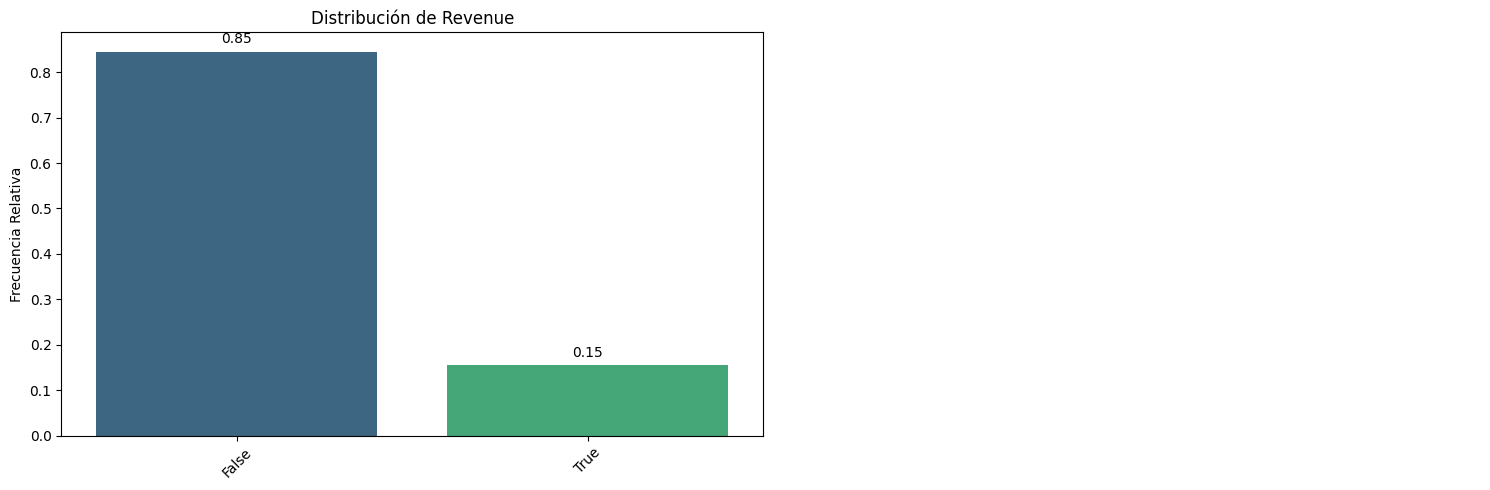

In [11]:
bt.pinta_distribucion_categoricas(df_shopping, columnas_categoricas=[target], relativa=True, mostrar_valores=True)

- Se aprecia un target muy desbalanceado como era de esperar. Los casos en los que se finalizo con compra son unicamente del 15 %.   
- Esto nos hará trabajar con el target para aplicar técnicas que permitan el balanceo y por lo tanto un correcto aprencizaje del modelo.   
- Al tener mas de 12.000 instancias, se estudiara el comportamiento del modelo con reduccion de instancias y con creacion de nuevas.

---

## `2.2.2 - Features`

In [12]:
tbb.ALL_lista_features(df_shopping)

Num: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Browser', 'TrafficType'], Cat: ['SpecialDay', 'Month', 'OperatingSystems', 'Region', 'VisitorType', 'Weekend', 'Revenue']


In [13]:
fea_num = ['Administrative',
            'Administrative_Duration',
              'Informational',
                'Informational_Duration',
                  'ProductRelated',
                    'ProductRelated_Duration',
                      'BounceRates',
                        'ExitRates',
                          'PageValues',
                            'Browser',
                              'TrafficType']
fea_cat = ['SpecialDay',
            'Month',
              'OperatingSystems',
                'Region',
                  'VisitorType',
                    'Weekend']

## `Categóricas`

### Test de hipótesis

In [14]:
results = {}
for col in fea_cat:
    contingency_table = pd.crosstab(df_shopping[col], df_shopping[target])  # Tabla de contingencia
    chi2, p, dof, _ = chi2_contingency(contingency_table)  # Test de Chi-cuadrado
    results[col] = {'Chi2': chi2, 'p-valor': p, "Relación estadística" : "SI" if p < 0.05 else "NO" }

chi2_results = pd.DataFrame(results).T.sort_values(by="Chi2", ascending=False)
chi2_results

,Chi2,p-valor,Relación estadística
Month,384.934762,0.0,SI
VisitorType,135.251923,0.0,SI
SpecialDay,96.076906,0.0,SI
OperatingSystems,75.027056,0.0,SI
Weekend,10.390978,0.001266,SI
Region,9.252751,0.321425,NO


In [15]:
features_hipotesis_cat = ['SpecialDay',
            'Month',
              'OperatingSystems',
                  'VisitorType'
                    ]

- Se oberva como Region no tiene una relacion significativa con el target (si la operacion acaba o no en compra).  
Si se oberva el grafico se ve esta NO relacion, pues los valores relativos son practicamente iguales, independientemete del valro del target.

- Tambien se ve en Weekend como la relacion no es muy fuerte. El grafico lo demuestra, pues en la diferentes categorias de Weekend, los porcentages son muy parejos independeintemente de que el target sea True o False.

Por ese motivo, muy seguramente excluyamos para el entrenamiento del modelo estas dos variables.

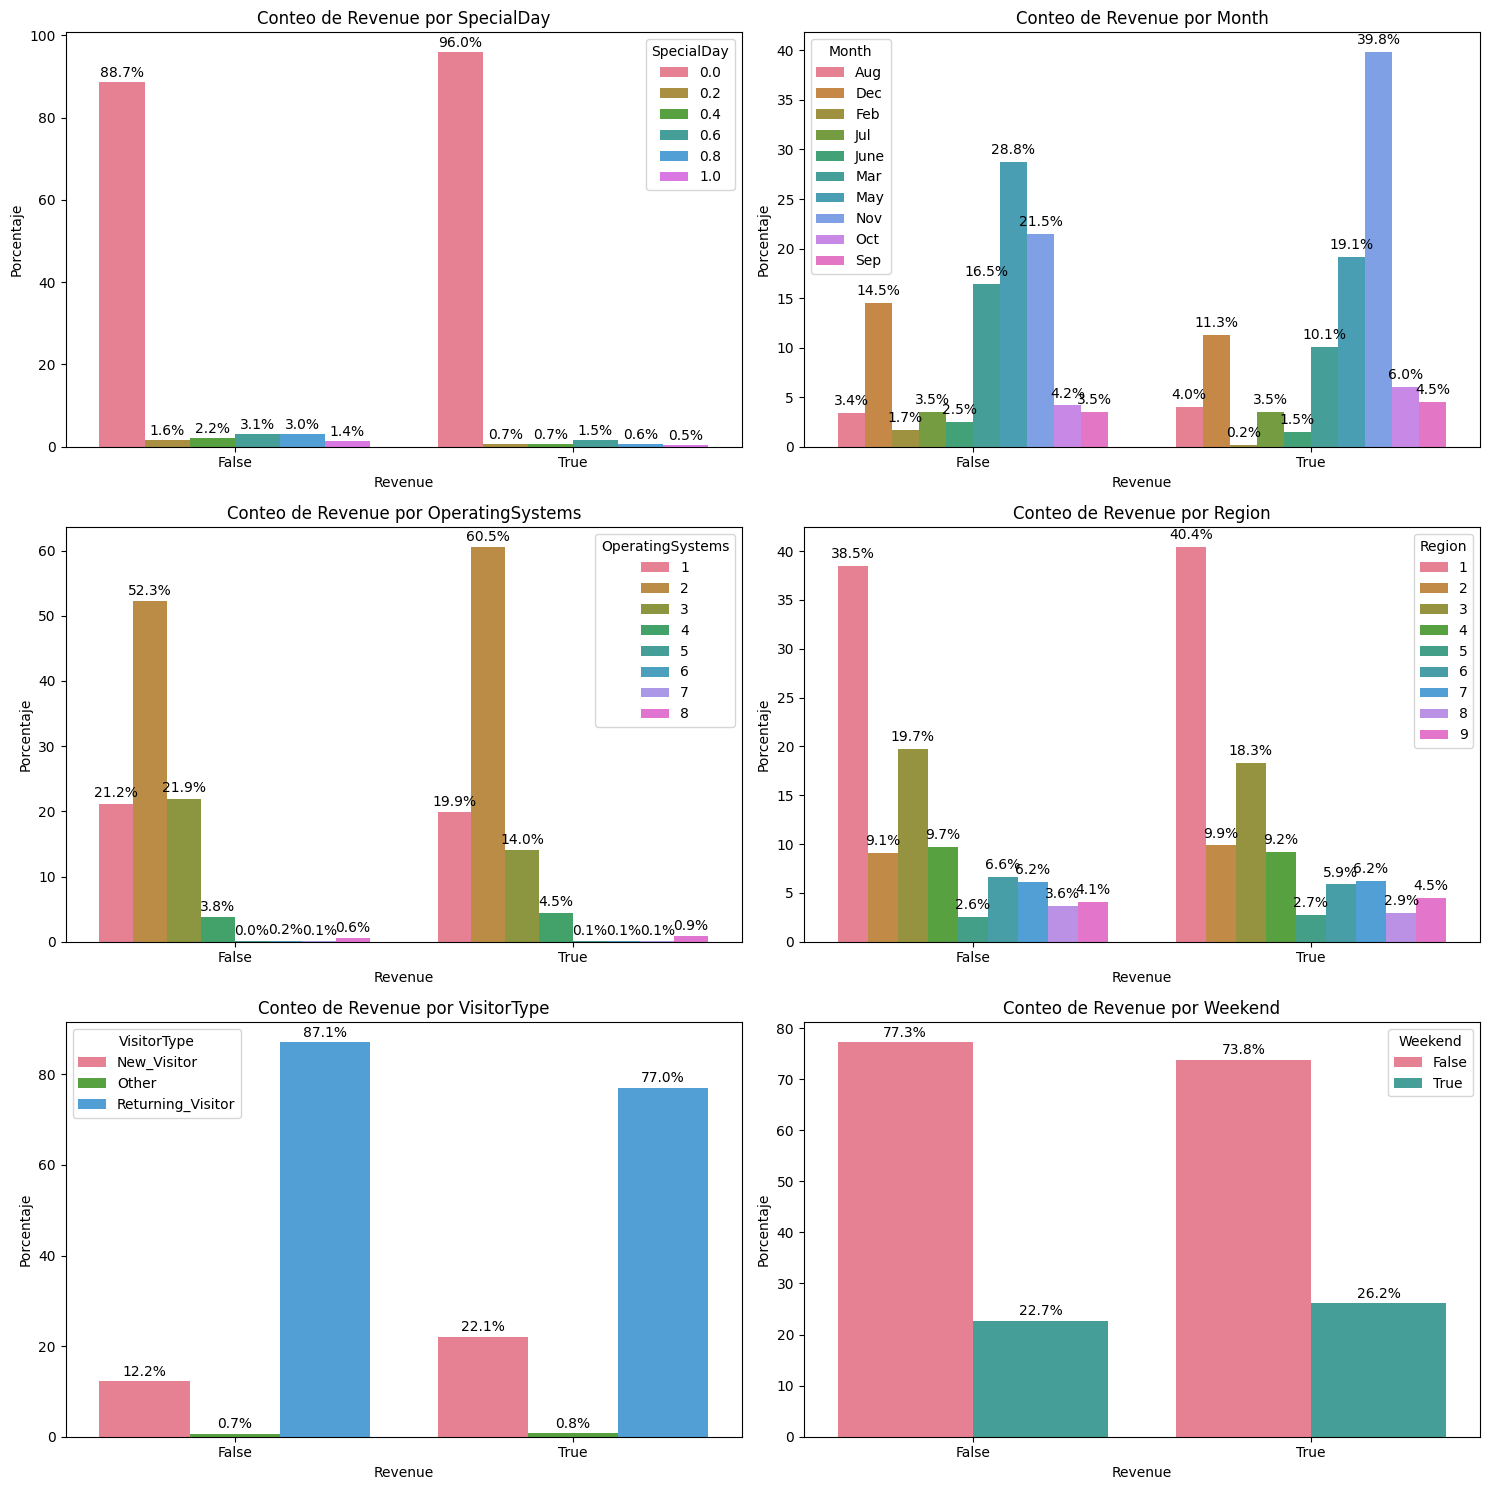

In [16]:
tbb.CLASI_BI_FeaCat_bar_plot(df=df_shopping,target=target, features_to_compare=fea_cat, show_percentage=True)

---

## `Numéricas`

### Test de hipótesis

In [ ]:
results = {}
for col in fea_num:
    grupo_0 = df_shopping[df_shopping[target] == 0][col]
    grupo_1 = df_shopping[df_shopping[target] == 1][col]

    # Mann-Whitney U
    u_stat, p_valor = mannwhitneyu(grupo_0, grupo_1)
    results[col] = {'U-statistic': u_stat, 'p-value': p_valor, 'Relación estadística' :"SI" if p_valor < 0.05 else "NO" }
resultados = pd.DataFrame(results).T
resultados


,U-statistic,p-value,Relación estadística
Administrative,7421135.5,0.0,SI
Administrative_Duration,7487115.0,0.0,SI
Informational,8648742.0,0.0,SI
Informational_Duration,8711649.0,0.0,SI
ProductRelated,6792127.0,0.0,SI
ProductRelated_Duration,6502463.0,0.0,SI
BounceRates,12198493.0,0.0,SI
ExitRates,13981307.0,0.0,SI
PageValues,2718419.0,0.0,SI
Browser,9723556.5,0.071462,NO


In [18]:
features_hipotesis_num = ['Administrative',
            'Administrative_Duration',
              'Informational',
                'Informational_Duration',
                  'ProductRelated',
                    'ProductRelated_Duration',
                      'BounceRates',
                        'ExitRates',
                          'PageValues'
                            ]

- Hay dos features (Browser y TrafficType) que no cumplen con la significacia estadistica suficiente.   
esto nos hace pensar que serán poco relevantes para que el modelo aprenda de ellas, por lo que se analizara si no suarlas para el aprendizaje.

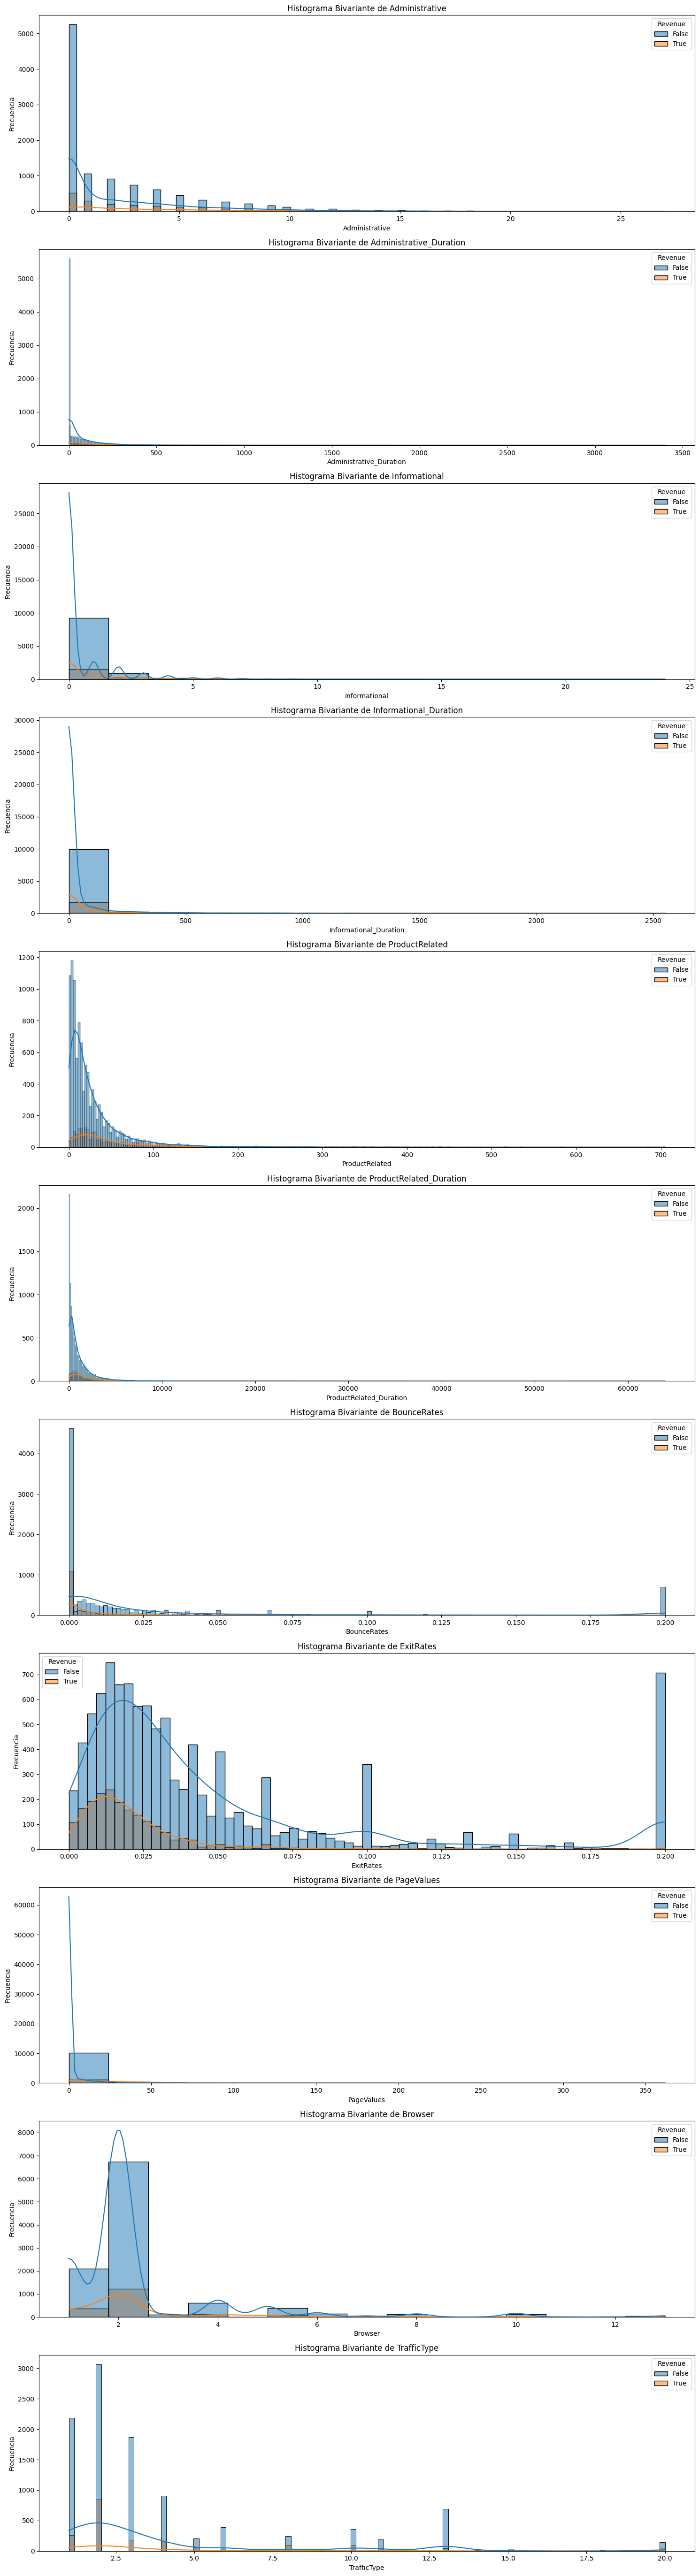

In [19]:
tbb.CLASI_BI_FeaNum_hist_kde_plot(df_shopping,fea_num,target, num_graf_per_line=1)

(11, 2)


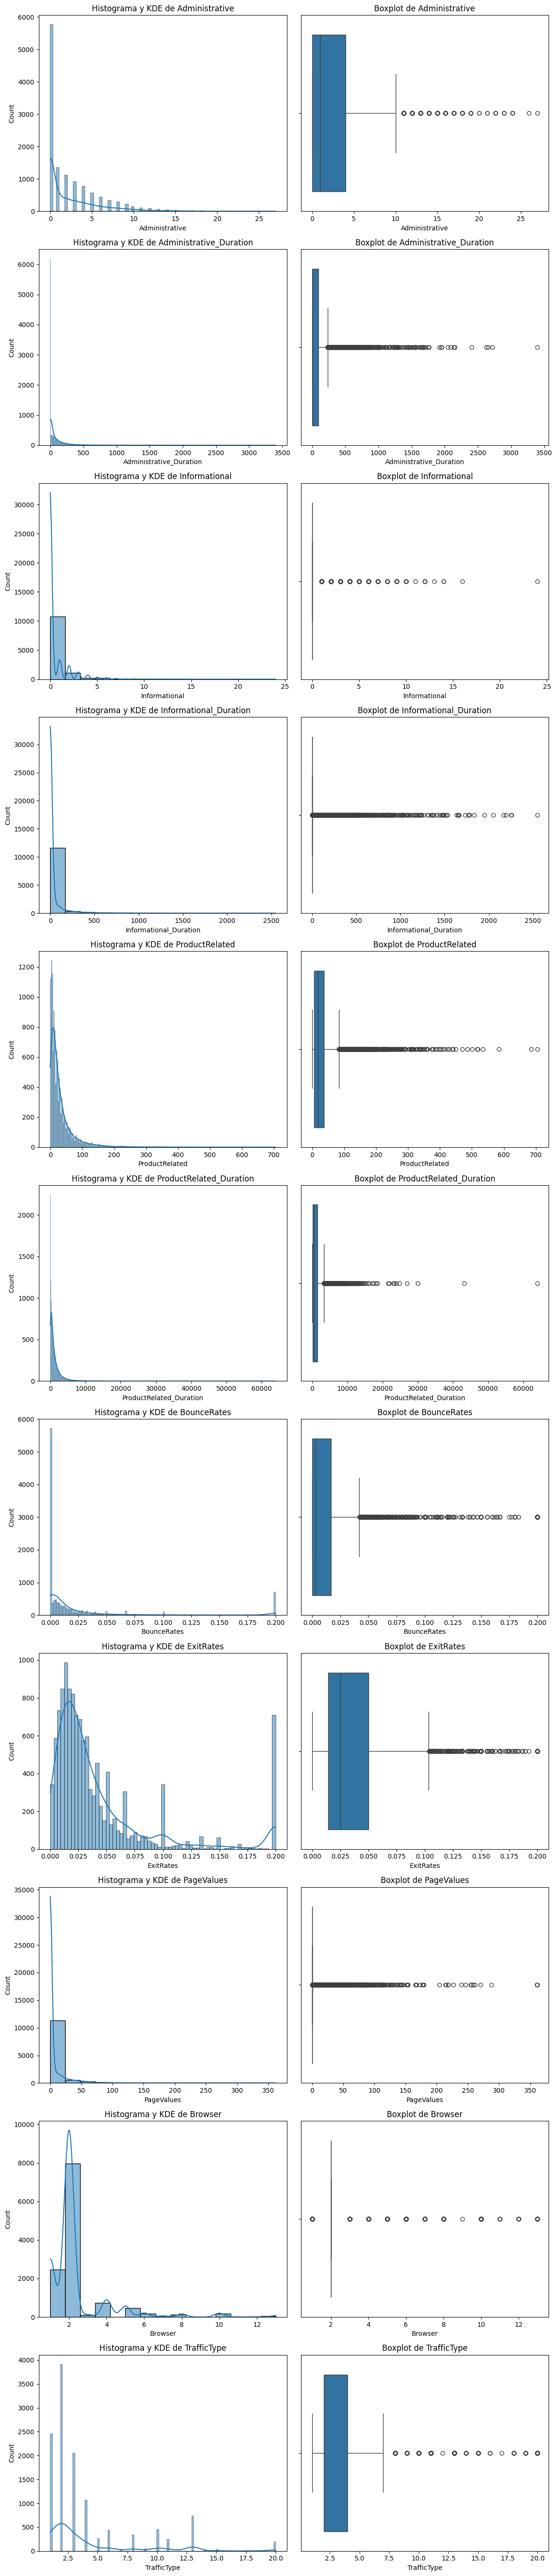

In [20]:
bt.plot_combined_graphs(df_shopping, fea_num)

- Muchas de la features numéricas presentan una gran cola, por lo que habra que aplicar alguna transformación para mejorarlas.   
Tambien habra que estandarizar para que el modelo no intreprete algunas como mas relevantes que las otras.

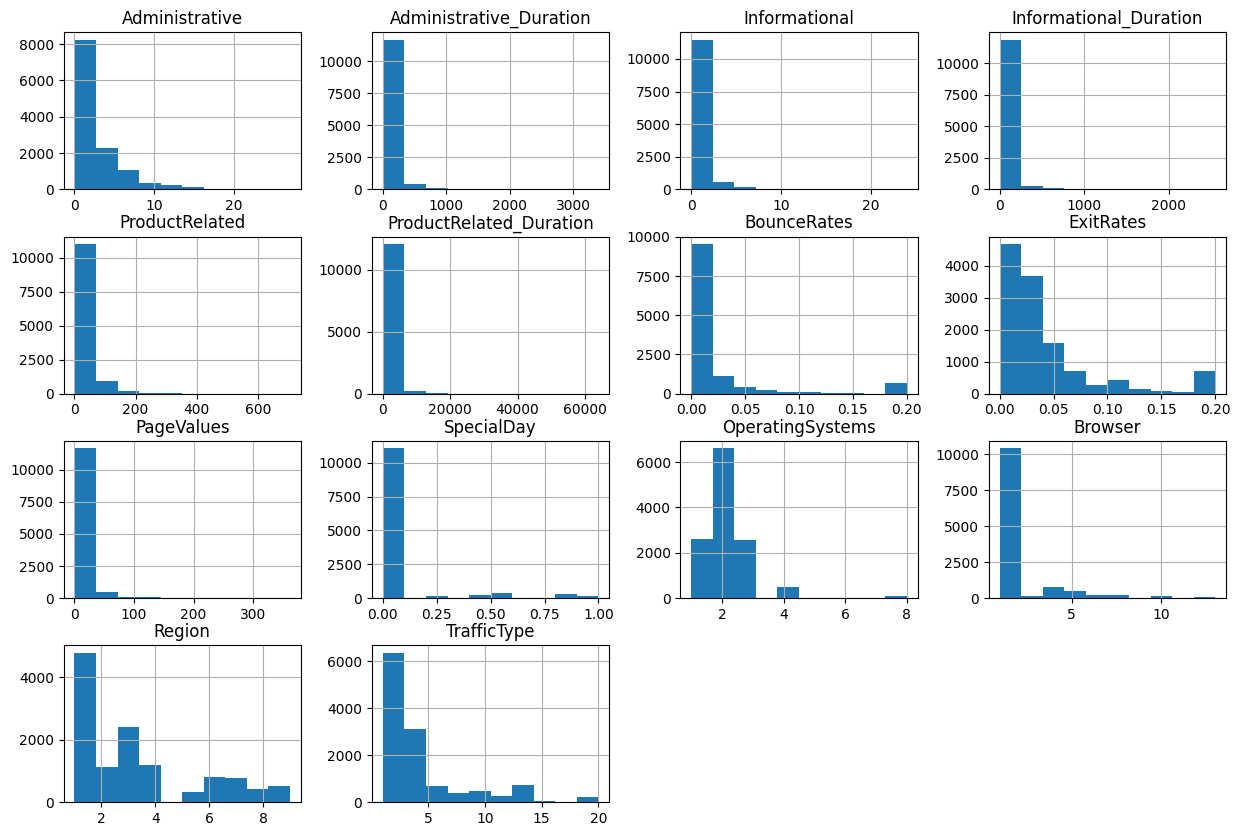

In [21]:
df_shopping.hist(figsize=(15,10));

In [22]:
features_hipotesis = features_hipotesis_cat + features_hipotesis_num
features_hipotesis

['SpecialDay',
 'Month',
 'OperatingSystems',
 'VisitorType',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

# `3 - Modelo Baseline`

### `3.1 - Sin balancear`

- Se va crear un modelo baseline con XgBoost (algoritmo ya pontente de por si).   
- Se comparará este baseline con otros dos:
    - Baseline con SMOTE --> 4.1 c)
    - Baseline con Feature reduction sin SMOTE --> 5.1
    - Baseline con Feature reduction con SMOTE --> 5.2

In [23]:
# Convertir columnas categóricas a tipo category
X = df_shopping[fea_cat + fea_num].copy()
y = df_shopping['Revenue'].astype(int)

# Convertir todas las columnas categóricas restantes a category
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

X["SpecialDay"] = X["SpecialDay"].astype("category")

In [24]:
pesos = y.value_counts()
peso_clases = pesos.iloc[0]/pesos.iloc[1]
peso_clases

5.462264150943396

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [26]:
modelo_xgb = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

modelo_xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2084
           1       0.61      0.68      0.64       382

    accuracy                           0.88      2466
   macro avg       0.77      0.80      0.78      2466
weighted avg       0.89      0.88      0.88      2466

Confusion Matrix:


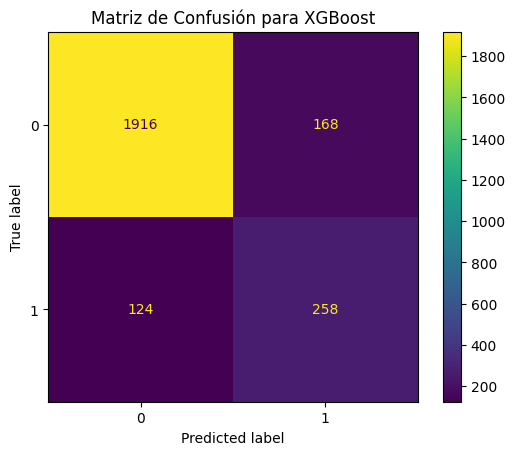

In [27]:
y_pred = modelo_xgb.predict(X_test)

# Obtener el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusión para XGBoost")
plt.show()

### `3.2 - Balanceado`

### Ver apartado 4.1 c)

---

# `4 - Selección de Features`

## `4.1 - Feature Importance con XGBoost`

## a) Aplicando `scale_pos_weight`

In [28]:
pesos = y.value_counts()
peso_clases = pesos.iloc[0]/pesos.iloc[1]
peso_clases

5.462264150943396

In [29]:
modelo_xgb = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
# Obtener la importancia de las características
importancias_xgb = modelo_xgb.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
xgb_importancia = pd.DataFrame({"Feature": X.columns, "Importancia": importancias_xgb})
xgb_importancia = xgb_importancia.sort_values(by="Importancia", ascending=False)
xgb_importancia

,Feature,Importancia
14,PageValues,0.416915
1,Month,0.105738
4,VisitorType,0.039078
0,SpecialDay,0.037045
11,ProductRelated_Duration,0.036667
10,ProductRelated,0.035024
6,Administrative,0.035011
12,BounceRates,0.033980
13,ExitRates,0.032777
15,Browser,0.030978


In [ ]:
selector_modelo = SelectFromModel(estimator = modelo_xgb, threshold= "median") # Nos quedamos con la mitad
selector_modelo.fit(X_train, y_train)
features_modelo_xgb = list(selector_modelo.get_feature_names_out())
features_modelo_xgb

['SpecialDay',
 'Month',
 'VisitorType',
 'Administrative',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

## b) Aplicando `under_sampling`

In [32]:
from imblearn.under_sampling import RandomUnderSampler

# Sobremuestreo para balancear las clases
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

In [33]:
print(X_balanced.shape, y_balanced.shape)

(3816, 17) (3816,)


In [34]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [35]:
modelo_xgb_us = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

modelo_xgb_us.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [36]:
# Obtener la importancia de las características
importancias_xgb = modelo_xgb_us.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
xgb_importancia = pd.DataFrame({"Feature": X_balanced.columns, "Importancia": importancias_xgb})
xgb_importancia = xgb_importancia.sort_values(by="Importancia", ascending=False)
xgb_importancia

,Feature,Importancia
14,PageValues,0.296007
1,Month,0.156655
0,SpecialDay,0.103687
4,VisitorType,0.044468
5,Weekend,0.041797
10,ProductRelated,0.034665
6,Administrative,0.032663
13,ExitRates,0.031523
16,TrafficType,0.031279
12,BounceRates,0.030548


In [37]:
selector_modelo = SelectFromModel(estimator = modelo_xgb_us, threshold= "median") # Nos quedamos con la mitad
selector_modelo.fit(X_train, y_train)
features_modelo_us = list(selector_modelo.get_feature_names_out())
features_modelo_us

['SpecialDay',
 'Month',
 'VisitorType',
 'Administrative',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

## c) Aplicando `SMOTE`

In [38]:
from imblearn.over_sampling import SMOTE

# Convertir columnas categóricas a tipo category
X = df_shopping[fea_cat + fea_num].copy()
y = df_shopping['Revenue'].astype(int)


# Convertir todas las columnas categóricas restantes a 'category'
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')


for col in X.select_dtypes(include='category').columns:
    X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [39]:
smote = SMOTE(random_state=42)
X_balanced_smote, y_balanced_smote = smote.fit_resample(X_train, y_train)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9864, 17) (2466, 17) (9864,) (2466,)


In [41]:
modelo_xgb_smote = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

modelo_xgb_smote.fit(X_balanced_smote, y_balanced_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2084
           1       0.53      0.77      0.63       382

    accuracy                           0.86      2466
   macro avg       0.74      0.82      0.77      2466
weighted avg       0.89      0.86      0.87      2466

Confusion Matrix:


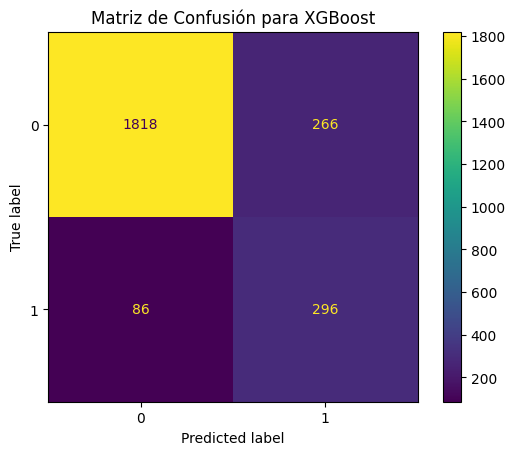

In [42]:
y_pred = modelo_xgb_smote.predict(X_test)

# Obtener el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusión para XGBoost")
plt.show()

In [43]:
# Obtener la importancia de las características
importancias_xgb = modelo_xgb_smote.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
xgb_importancia = pd.DataFrame({"Feature": X.columns, "Importancia": importancias_xgb})
xgb_importancia = xgb_importancia.sort_values(by="Importancia", ascending=False)
xgb_importancia

,Feature,Importancia
14,PageValues,0.401435
4,VisitorType,0.089001
1,Month,0.086630
5,Weekend,0.048332
2,OperatingSystems,0.047487
0,SpecialDay,0.044532
8,Informational,0.035589
15,Browser,0.028877
6,Administrative,0.028598
7,Administrative_Duration,0.028459


In [44]:
selector_modelo = SelectFromModel(estimator = modelo_xgb_smote, threshold= "median") # Nos quedamos con la mitad
selector_modelo.fit(X_train, y_train)
features_modelo_smote = list(selector_modelo.get_feature_names_out())
features_modelo_smote

['SpecialDay',
 'Month',
 'VisitorType',
 'Administrative',
 'ProductRelated',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType']

## `3.2- Feature ANOVA y Mutual Information`

## `ANOVA`

In [45]:
X_train_ANOVA = X_train[fea_num]
y_train_ANOVA = y_train
selector = SelectKBest(f_classif, k=10)
x_data_kbest = selector.fit_transform(X_train_ANOVA, y_train_ANOVA)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Browser
0,8.0,732.250000,0.0,0.0,34.0,1345.755952,0.005128,0.013342,12.274195,3.0
1,0.0,0.000000,0.0,0.0,4.0,157.200000,0.040000,0.100000,0.000000,8.0
2,0.0,0.000000,0.0,0.0,4.0,42.000000,0.000000,0.050000,0.000000,10.0
3,2.0,338.000000,0.0,0.0,17.0,1205.566667,0.012500,0.037500,19.236250,2.0
4,0.0,0.000000,0.0,0.0,32.0,827.646212,0.000000,0.000587,54.676348,2.0
...,...,...,...,...,...,...,...,...,...,...
9859,4.0,69.000000,1.0,0.0,19.0,580.500000,0.010526,0.049123,22.329347,2.0
9860,4.0,16.666667,0.0,0.0,68.0,2593.741667,0.002941,0.012843,0.000000,2.0
9861,0.0,0.000000,0.0,0.0,17.0,433.133333,0.023529,0.051961,0.000000,2.0
9862,0.0,0.000000,0.0,0.0,73.0,2784.800000,0.002740,0.015318,6.135982,2.0


In [46]:
features_anova = list(selector.get_feature_names_out())
features_anova

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'Browser']

## `Mutual Information`

In [47]:
X_train_MI = X_train[fea_cat]
y_train_MI = y_train

mi = {}
for col in fea_cat:
    mi[col] = mutual_info_score(X_train_MI[col],y_train_MI)
features = pd.Series(mi)/sum(mi.values())
features

SpecialDay          0.196077
Month               0.502692
OperatingSystems    0.111523
Region              0.009898
VisitorType         0.159678
Weekend             0.020133
dtype: float64

In [48]:
features_MU = list(features.index)
features_MU

['SpecialDay', 'Month', 'OperatingSystems', 'Region', 'VisitorType', 'Weekend']

## `3.3 - SFS`

In [ ]:
# Convertir columnas categóricas a tipo category
X = df_shopping[fea_cat + fea_num].copy()
y = df_shopping['Revenue'].astype(int) 

# Convertir todas las columnas categóricas restantes a 'category'
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

X["SpecialDay"] = X["SpecialDay"].astype("category")

In [50]:
modelo_xgb = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

sfs_forward = SequentialFeatureSelector(modelo_xgb,
                                        n_features_to_select = 10,
                                        cv = 4,
                                        scoring = "balanced_accuracy")

sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=True,
                                                  eval_metric='aucpr',
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=42, ...),
                          n_features_to_select=10, scoring='balanced_accuracy')

In [51]:
features_SFS = list(sfs_forward.get_feature_names_out())
features_SFS

['SpecialDay',
 'Month',
 'OperatingSystems',
 'VisitorType',
 'Weekend',
 'Informational',
 'ProductRelated',
 'ProductRelated_Duration',
 'PageValues',
 'Browser']

## `3.4 - RFE`

In [ ]:
modelo_xgb = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

rfe = RFE(estimator = modelo_xgb,
        n_features_to_select= 10,
        step = 1)

rfe.fit(X_train, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None, enable_categorical=True,
                            eval_metric='aucpr', feature_types=None, gamma=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=42, ...),
    n_features_to_select=10)

In [53]:
features_RFE = list(rfe.get_feature_names_out())
features_RFE

['SpecialDay',
 'Month',
 'VisitorType',
 'Administrative',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType']

## `3.5 - Hard-Voting`

In [54]:
lista_total = features_hipotesis + features_anova + features_MU + features_modelo_us + features_modelo_smote + features_modelo_xgb + features_RFE +  features_SFS
votaciones = Counter(lista_total)
votaciones

Counter({'SpecialDay': 7,
         'Month': 7,
         'VisitorType': 7,
         'ProductRelated': 7,
         'PageValues': 7,
         'Administrative': 6,
         'ProductRelated_Duration': 6,
         'BounceRates': 6,
         'ExitRates': 6,
         'OperatingSystems': 3,
         'Informational': 3,
         'Administrative_Duration': 2,
         'Informational_Duration': 2,
         'Browser': 2,
         'Weekend': 2,
         'TrafficType': 2,
         'Region': 1})

In [55]:
escrutinio = pd.DataFrame(votaciones.values(), columns = ["Votos"], index = votaciones.keys()).sort_values("Votos", ascending = False)
escrutinio

,Votos
SpecialDay,7
Month,7
PageValues,7
ProductRelated,7
VisitorType,7
Administrative,6
ProductRelated_Duration,6
BounceRates,6
ExitRates,6
Informational,3


## `3.6 - Features finales`

- Tras las diferentes tecnicas para encontrar aquella features mas relevamtes o que tiene mas significancia estaditica respecto al target, se ha obtenido la lista:

>SpecialDay    
Month    
PageValues    
ProductRelated    
VisitorType      
Administrative    
ProductRelated_Duration    
BounceRates    
ExitRates    

- Se han seleccionado aquellas que han salido al menos en 6 veces.

In [56]:
features_finales = list(escrutinio[escrutinio["Votos"] >= 6].index)
features_finales


['SpecialDay',
 'Month',
 'PageValues',
 'ProductRelated',
 'VisitorType',
 'Administrative',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates']

- Aqui las features que no vamos a usar:

In [57]:
features_to_drop =[]

for col in X.columns:
    if col not in features_finales:
        features_to_drop.append(col)

features_to_drop

['OperatingSystems',
 'Region',
 'Weekend',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'Browser',
 'TrafficType']

In [58]:
tbb.ALL_describe_features(df=df_shopping[features_finales])

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,SpecialDay,float64,12330,0,0.0,6,0.05,Categórica
1,Month,object,12330,0,0.0,10,0.08,Numérica Discreta
2,PageValues,float64,12330,0,0.0,2704,21.93,Numérica Discreta
3,ProductRelated,int64,12330,0,0.0,311,2.52,Numérica Discreta
4,VisitorType,object,12330,0,0.0,3,0.02,Categórica
5,Administrative,int64,12330,0,0.0,27,0.22,Numérica Discreta
6,ProductRelated_Duration,float64,12330,0,0.0,9551,77.46,Numérica Continua
7,BounceRates,float64,12330,0,0.0,1872,15.18,Numérica Discreta
8,ExitRates,float64,12330,0,0.0,4777,38.74,Numérica Continua


# `4 - Analisis detallado features`

## `4.1 - Categóricas`

In [ ]:
fea_cat_model = ["Month", "SpecialDay", "VisitorType"]

## `"Month"`

In [60]:
print(df_shopping.Month.unique())
print(df_shopping.Month.value_counts())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


- Month es de tipo object, pero vamos a convertirlo a categorica por si algun modelo lo necesita.    
- Tambien haremos un one-hot-encoder para aquellos modelos que no pueda funcionar con variables categoricas.

## `"SpecialDay"`

In [61]:
print(df_shopping.SpecialDay.unique())
print(df_shopping.SpecialDay.value_counts())

[0.  0.4 0.8 1.  0.2 0.6]
SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64


- Esta feature es nos da la cercania de la compra a una fecha concreta de alto consumo.   
- El valor 1 indica que la compra se realizo el mismo dia que la fecha concreta de alto consumo.
- No esta claro que significa cada uno de los valores, solamente que cuanto mas bajo, mas alejado estaba la compra de una fecha de alto consumo.
- Esta claro que la variable es categorica ordinal, pero no se sabe el significado de cada uno de los steps, por lo que seguramente sea codificada con un one-hot-encoder para aquellos modelos que lo necesiten y tambien se le cambiara el tipo de float a category.

## `"VisitorType"`

In [62]:
print(df_shopping.VisitorType.unique())
print(df_shopping.VisitorType.value_counts())

['Returning_Visitor' 'New_Visitor' 'Other']
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


- Esta feature necesita poca explicación.   
- Como en los casos anteriores, la pasaremos a categorica y la convertiremos con un one-hot-encoder por si algun modelo la necesita.

## `4.2 - Numéricas`

In [63]:
fea_num_model = ["Administrative","ProductRelated", "PageValues", "ProductRelated_Duration", "BounceRates", "ExitRates"]

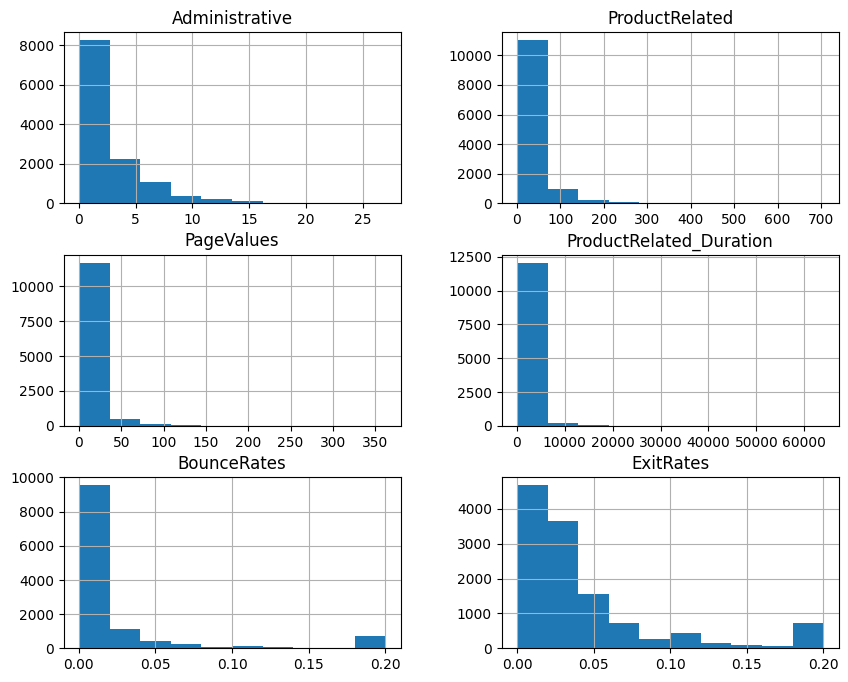

In [64]:
df_shopping[fea_num_model].hist(figsize=(10,8));

- Vemos que las features numericas necesitan mejorar la larga cola asi como una estandrixacion para que todas se muevan entorno a la misma magnitud de valores.   
- Para ellos aplicaremos mednaite Pipeline, la mejor tranformacion y estandarización.

# `5 - Baseline con transformaciones` 

### `5.1 - Baseline con Feature reduction sin SMOTE`

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2084
           1       0.59      0.71      0.64       382

    accuracy                           0.88      2466
   macro avg       0.77      0.81      0.78      2466
weighted avg       0.89      0.88      0.88      2466

Confusion Matrix:


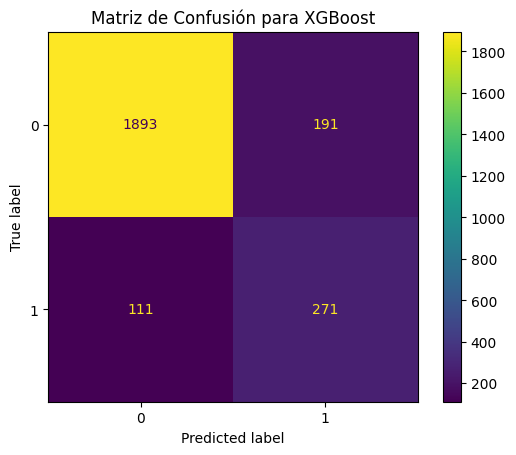

In [65]:
# Convertir columnas categóricas a tipo category
X = df_shopping[fea_cat_model + fea_num_model].copy()
y = df_shopping['Revenue'].astype(int)

# Convertir todas las columnas categóricas restantes a category
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

X["SpecialDay"] = X["SpecialDay"].astype("category")

pesos = y.value_counts()
peso_clases = pesos.iloc[0]/pesos.iloc[1]
peso_clases

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

modelo_xgb = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

modelo_xgb.fit(X_train, y_train)

y_pred = modelo_xgb.predict(X_test)

# Obtener el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusión para XGBoost")
plt.show()

### `5.2 - Baseline con Feature reduction con SMOTE`

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2084
           1       0.49      0.79      0.60       382

    accuracy                           0.84      2466
   macro avg       0.72      0.82      0.75      2466
weighted avg       0.88      0.84      0.85      2466

Confusion Matrix:


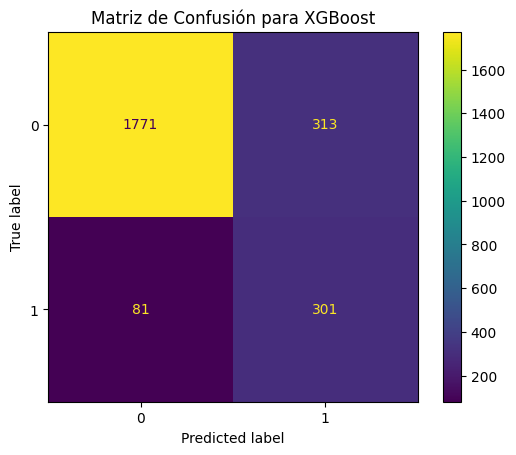

In [66]:
# Convertir columnas categóricas a tipo category
X = df_shopping[fea_cat_model + fea_num_model].copy()
y = df_shopping['Revenue'].astype(int)

# Convertir todas las columnas categóricas restantes a category
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

for col in X.select_dtypes(include='category').columns:
    X[col] = X[col].cat.codes

X["SpecialDay"] = X["SpecialDay"].astype("category")

pesos = y.value_counts()
peso_clases = pesos.iloc[0]/pesos.iloc[1]
peso_clases

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_reduction_balanced_smote, y_reduction_balanced_smote = smote.fit_resample(X_train, y_train)

modelo_xgb = xgb.XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='aucpr', 
                               scale_pos_weight=peso_clases, random_state=42)

modelo_xgb.fit(X_reduction_balanced_smote, y_reduction_balanced_smote)

y_pred = modelo_xgb.predict(X_test)

# Obtener el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusión para XGBoost")
plt.show()

# `5 - Separación de X e y` 

In [67]:
df_shopping = pd.read_csv("../data/raw/online_shoppers.csv")

In [68]:
X = df_shopping.drop(columns=target, axis=1)
y = df_shopping[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [72]:
X_train.shape

(9864, 17)

# `6 - Guardado de variables`

In [ ]:
# Carpeta de destino
variable_folder = "../features"
os.makedirs(variable_folder, exist_ok=True)

# Ruta del archivo guardado
variables_filename = os.path.join(variable_folder, "model_df_and_features.pkl")

# Guardar las variables
variables_to_save = {'df_shopping': df_shopping,
                    'fea_num_model': fea_num_model,
                    'fea_cat_model': fea_cat_model, 
                    'features_to_drop': features_to_drop,
                    'target': target,
                    'X_train': X_train,
                    'y_train': y_train,
                    'X_test': X_test,
                    'y_test': y_test
                    }
joblib.dump(variables_to_save, variables_filename)

print(f"Variables guardadas como: {variables_filename}")

Variables guardadas como: ../features\model_df_and_features.pkl
